In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nb
from scipy import ndimage
from nighres import surface, io

In [3]:
sns.set_context('poster')

In [4]:
template = nb.load('/home/julia/data/gradients/atlas/ABI_template_25um.nii')

### Add missing cortex piece to layer 6a

In [20]:
l6a_hole = nb.load('/home/julia/data/gradients/atlas/allen_api/l6a_2jo_orig.nii.gz').get_data()
missing_piece = nb.load('/home/julia/data/gradients/atlas/cortex/missing_piece_cortex_25um.nii.gz').get_data()

In [21]:
l6a_fixed = np.zeros(template.shape)
l6a_fixed[l6a_hole==1]=1
l6a_fixed[missing_piece==1]=1

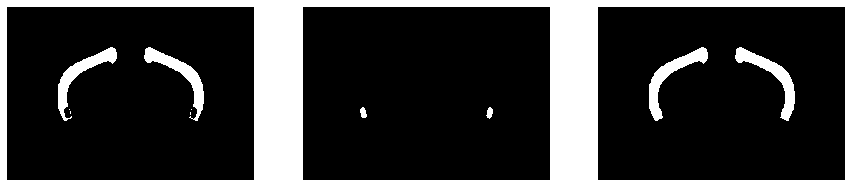

In [74]:
slice_idx = 350
f, ccf_axes = plt.subplots(1, 3, figsize=(15, 5))
ccf_axes[0].imshow(ndimage.rotate(l6a_hole[:,slice_idx,:], 90), cmap='gray', aspect='equal')
ccf_axes[0].axis('off')
ccf_axes[1].imshow(ndimage.rotate(missing_piece[:,slice_idx,:], 90), cmap='gray', aspect='equal')
ccf_axes[1].axis('off')
ccf_axes[2].imshow(ndimage.rotate(l6a_fixed[:,slice_idx,:], 90), cmap='gray', aspect='equal')
ccf_axes[2].axis('off')
plt.show()

In [53]:
nb.save(nb.Nifti1Image(l6a_hole, template.affine, template.header),
        '/home/julia/data/gradients/atlas/allen_api/l6a_2jo_orig.nii.gz')
nb.save(nb.Nifti1Image(l6a_fixed, template.affine, template.header),
        '/home/julia/data/gradients/atlas/allen_api/l6a_2jo.nii.gz')

### Create supra- and subgranular layer masks

In [91]:
supra = np.zeros(template.shape)
for l in ['l1', 'l2_3']:
    data = nb.load('/home/julia/data/gradients/atlas/allen_api/%s_2jo.nii.gz' %l).get_data()
    supra[data==1]=1
    
supra_plus = np.zeros(template.shape)
for l in ['l1', 'l2_3', 'l4']:
    data = nb.load('/home/julia/data/gradients/atlas/allen_api/%s_2jo.nii.gz' %l).get_data()
    supra_plus[data==1]=1

sub = np.zeros(template.shape)
for l in ['l5', 'l6a', 'l6b']:
    data = nb.load('/home/julia/data/gradients/atlas/allen_api/%s_2jo.nii.gz' %l).get_data()
    sub[data==1]=1

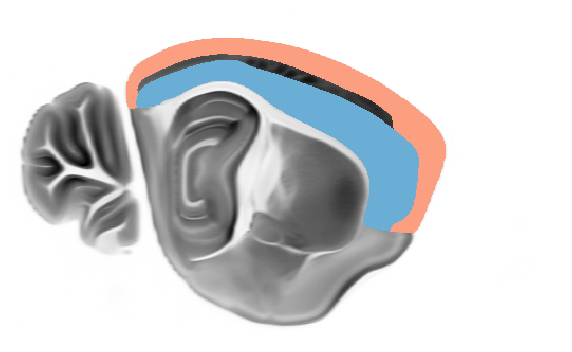

In [96]:
slice_idx=350
sub_img = ndimage.rotate(sub[slice_idx,:,:], 90)
sub_img[sub_img<0.2]=np.nan
supra_img = ndimage.rotate(supra[slice_idx,:,:], 90)
supra_img[supra_img<0.2]=np.nan
fig = plt.figure(figsize=(10,10))
plt.imshow(ndimage.rotate(template.get_data()[350,:,:],90),  cmap='Greys', aspect='equal');
plt.imshow(supra_img,  cmap="Reds", aspect='equal', vmin=0, vmax=3);
plt.imshow(sub_img,  cmap="Blues", aspect='equal', vmin=0, vmax=2);
plt.axis('off');

In [64]:
nb.save(nb.Nifti1Image(np.nan_to_num(supra), template.affine, template.header), 
        '/home/julia/data/gradients/atlas/allen_api/supragranular_2jo.nii.gz')
nb.save(nb.Nifti1Image(np.nan_to_num(sub), template.affine, template.header), 
        '/home/julia/data/gradients/atlas/allen_api/subgranular_2jo.nii.gz')
nb.save(nb.Nifti1Image(np.nan_to_num(supra_plus), template.affine, template.header), 
        '/home/julia/data/gradients/atlas/allen_api/supragranular_plus4_2jo.nii.gz')

### Create levelsets from layer masks

In [5]:
lvl = surface.probability_to_levelset('/home/julia/data/gradients/atlas/allen_api/subgranular_2jo.nii.gz')
lvl['result'].to_filename('/home/julia/data/gradients/atlas/allen_api/subgranular_2jo_lvl.nii.gz')


Probability to Levelset


In [5]:
lvl = surface.probability_to_levelset('/home/julia/data/gradients/atlas/allen_api/supragranular_2jo.nii.gz')
lvl['result'].to_filename('/home/julia/data/gradients/atlas/allen_api/supragranular_2jo_lvl.nii.gz')


Probability to Levelset


In [5]:
lvl = surface.probability_to_levelset('/home/julia/data/gradients/atlas/allen_api/supragranular_plus4_2jo.nii.gz')
lvl['result'].to_filename('/home/julia/data/gradients/atlas/allen_api/supragranular_plus4_2jo_lvl.nii.gz')


Probability to Levelset


In [ ]:
!fslmerge -t /home/julia/data/gradients/atlas/allen_api/upper_lower_lvl.nii.gz \
/home/julia/data/gradients/atlas/allen_api/subgranular_2jo_lvl.nii.gz \
/home/julia/data/gradients/atlas/allen_api/supragranular_plus4_2jo_lvl.nii.gz